<a href="https://colab.research.google.com/github/hzhang17/ANLY590/blob/master/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 Feedforward

part 1 & 2
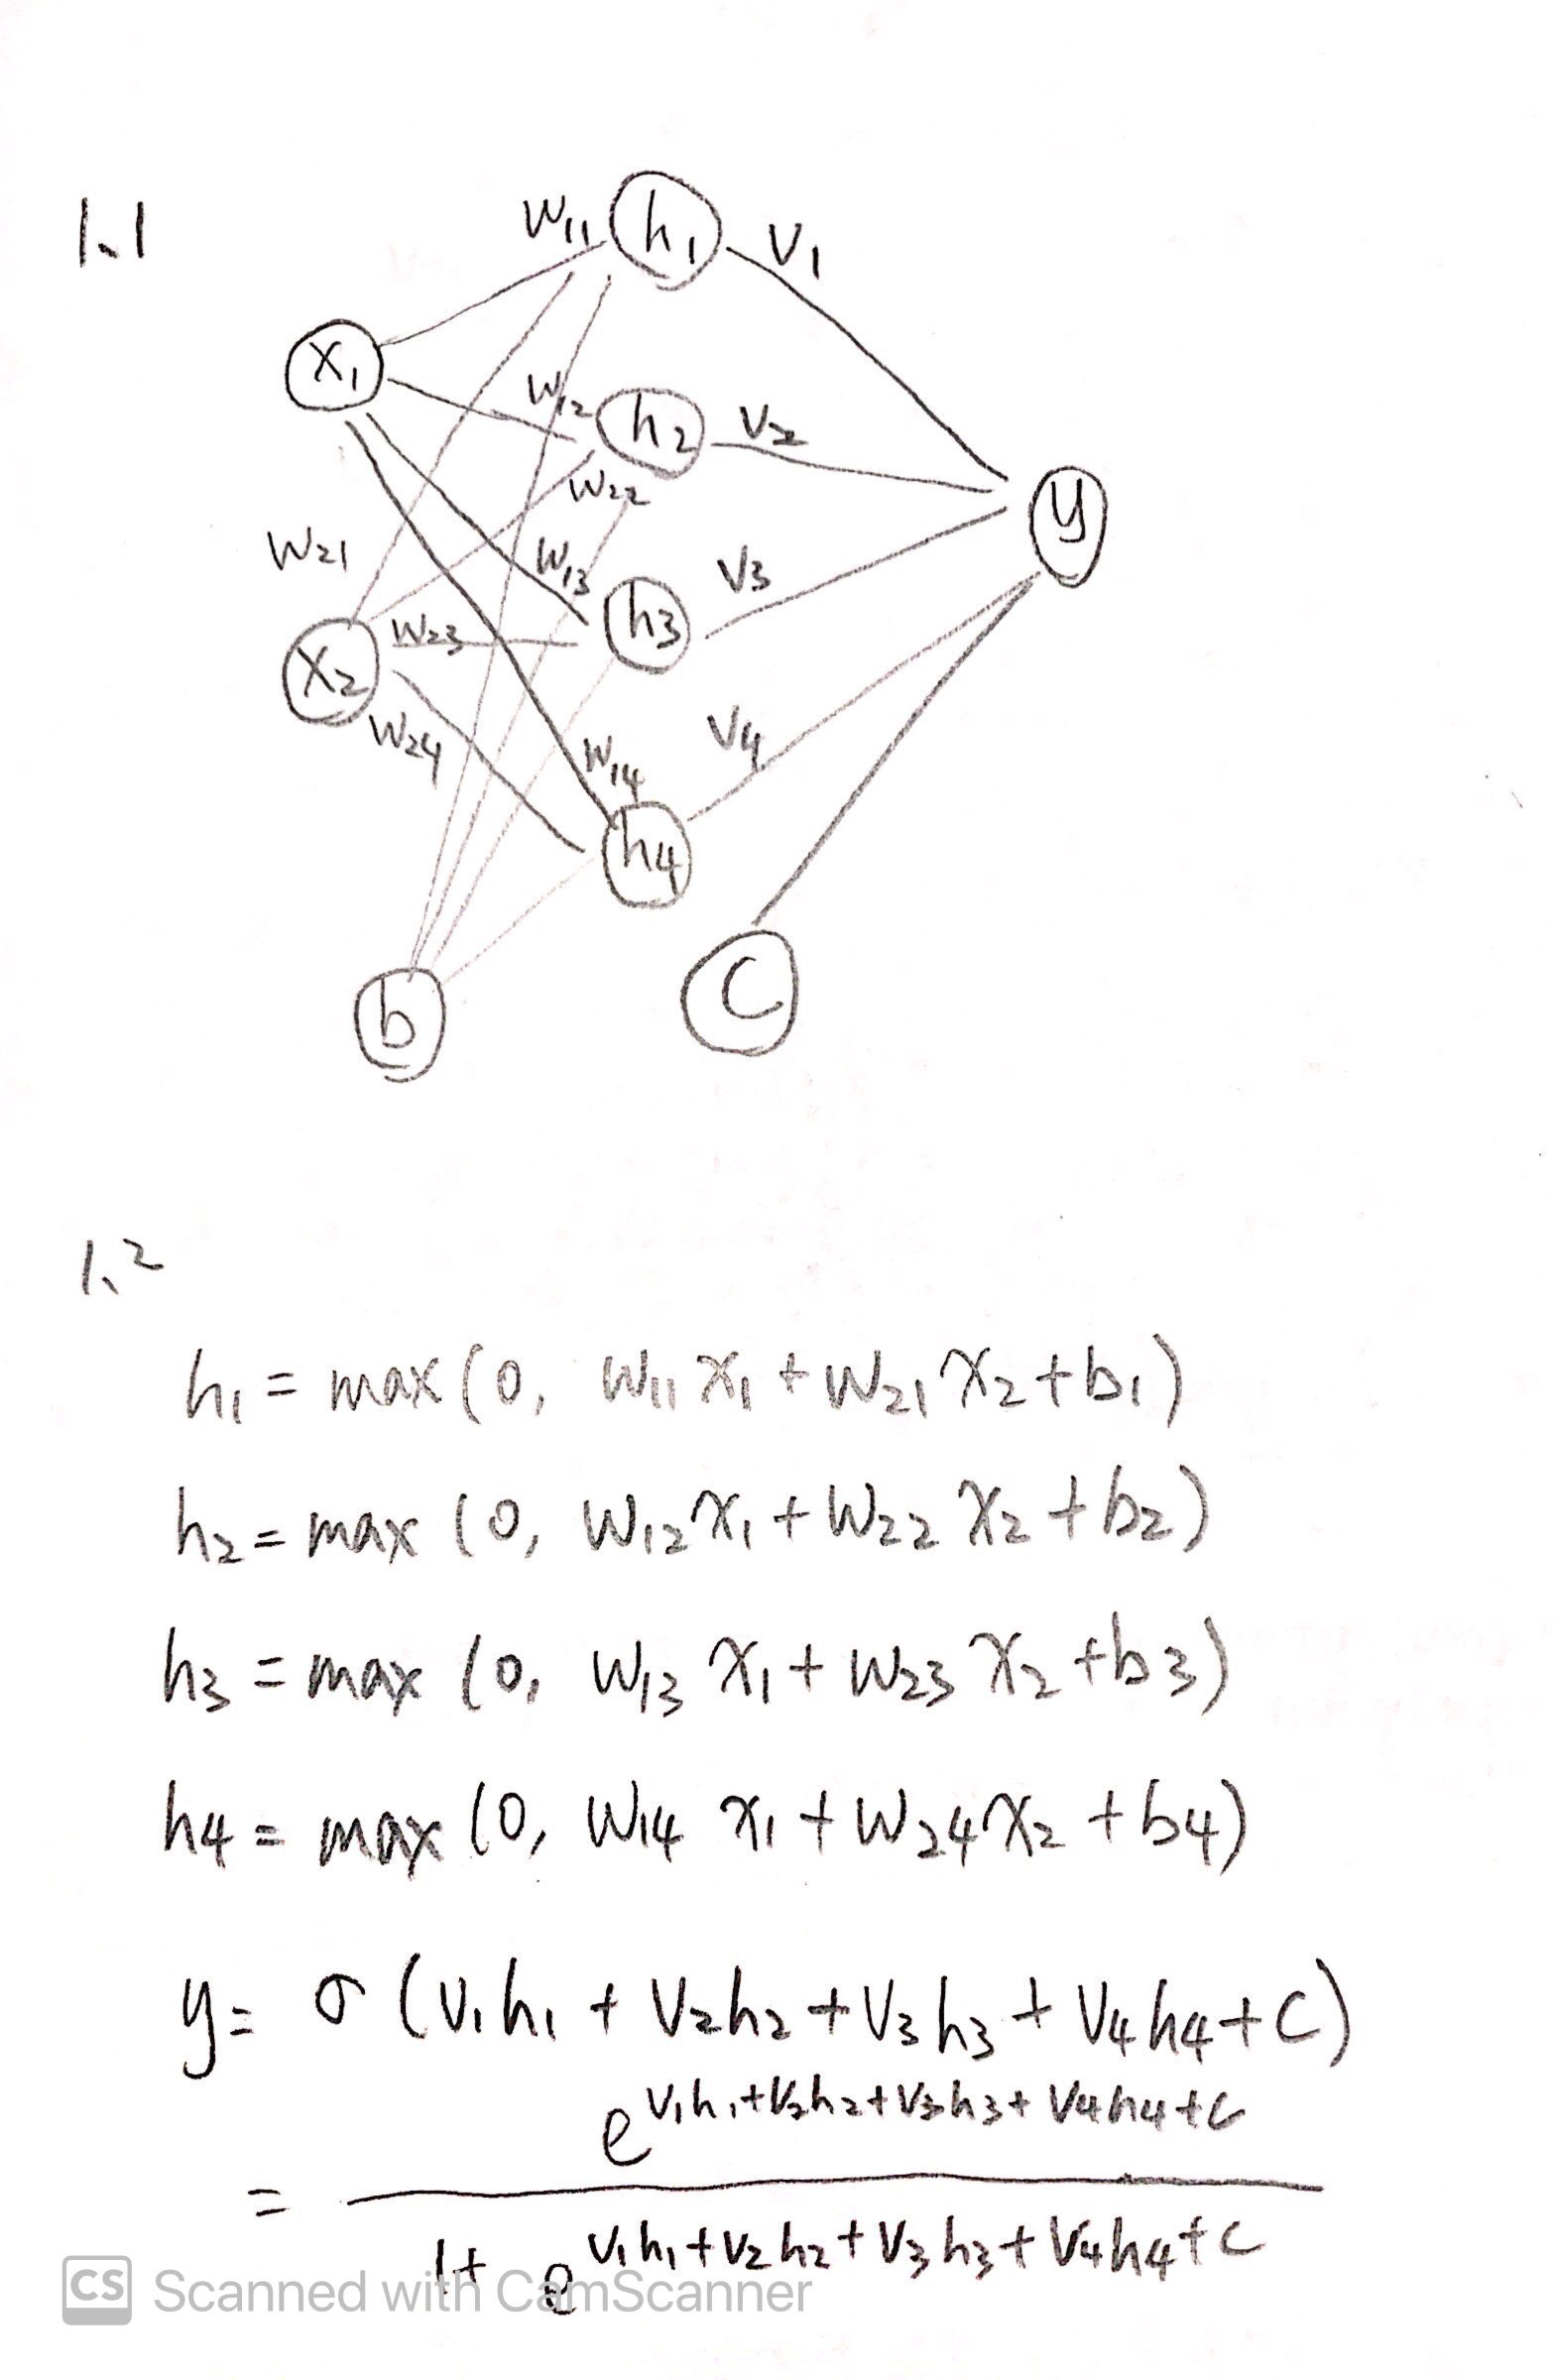

In [78]:
# part 3
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def ff_nn_Relu(X, W, b, v, c):
    h = relu(np.dot(X, W) + b)
    y_hat = sigmoid(np.dot(h, v) + c)
    return y_hat

In [72]:
# part 4
W = np.matrix([ [1, 0], [-1, 0], [0, 0.5], [1,1] ])
b = np.matrix([ [0], [0], [1], [0] ])
v = np.array([1, 0, -1, 1])
c = 1
X = np.matrix([ [1, 0, 0], [-1, -1, 1] ])

In [ ]:
h1 = relu(W.dot(X) + b)
print(h1)

[[1.  0.  0. ]
 [0.  0.  0. ]
 [0.5 0.5 1.5]
 [0.  0.  1. ]]


In [ ]:
z = v.dot(h1) + c
print(z)

[[1.5 0.5 0.5]]


In [ ]:
y_hat = sigmoid(z)
print(y_hat)

[[0.81757448 0.62245933 0.62245933]]


Problem 2 Gradient Descent

part 1
 
$\frac{\partial f}{\partial x} = -3x^2 + 100x - 200y^2 $

$\frac{\partial f}{\partial y} = 800 y^3 - 400xy$

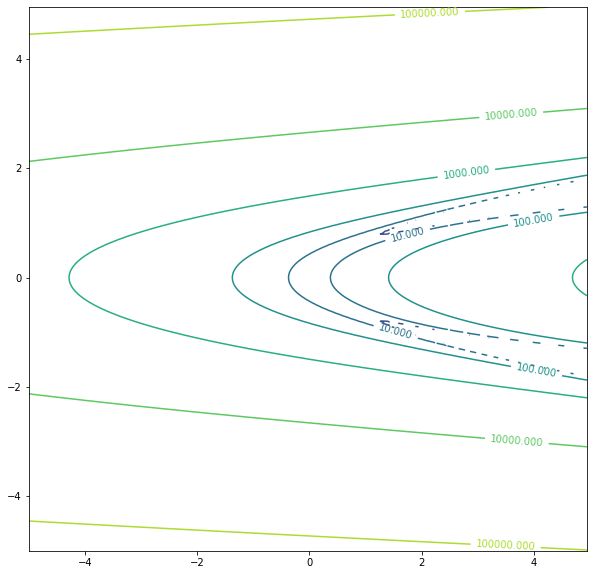

In [ ]:
# part 2
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import ticker
from math import cos, sin, atan

%matplotlib inline
warnings.filterwarnings("ignore")

def func(x, y):
    return (3 - x ** 3) + 50 * (2 * (y**2) - x) ** 2


delta = 0.05
x = np.arange(-5.0, 5.0, delta)
y = np.arange(-5.0, 5.0, delta)
X, Y = np.meshgrid(x, y)

plt.figure(figsize=(10, 10))
plt.contourf(X, Y, func(X, Y), 5, alpha=0, cmap=plt.cm.hot)
cp = plt.contour(X, Y, func(X, Y), 7, locator=ticker.LogLocator())
plt.clabel(cp, inline=True, fontsize=10)
plt.show()

In [ ]:
# part 3
def f(x):
    return (3 - x[0]**3) + 50 * (2 * (x[1]**2) - x[0]) ** 2

def grad(x):
    return np.array(-3 * (x[0]**2) + 100 * x[0] - 200 * (x[1]**2), 800 * (x[1]**3) - 400 * x[0] * x[1]))

def grad_descent(x, grad, alpha, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0,:] = x
    for i in range(max_iter):
        x = x - alpha * grad(x)
        xs[i+1,:] = x
    return xs

In [ ]:
def graph(iterations, alpha):
    x0 = np.array([-1, -1])
    xs = grad_descent(x0, grad, alpha, max_iter=iterations)

    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1, 1, 2, 4, 9, 16, 25, 36, 49]
    c = plt.contour(X, Y, func(X,Y), levels)
    plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
    plt.title('learning rate = {lr}'.format(lr = alpha))
    plt.show()

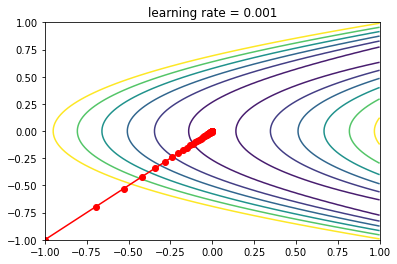

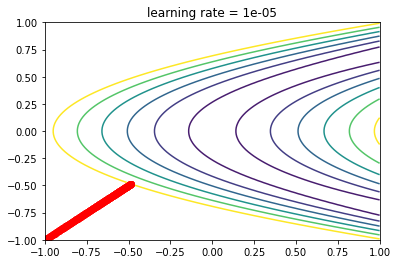

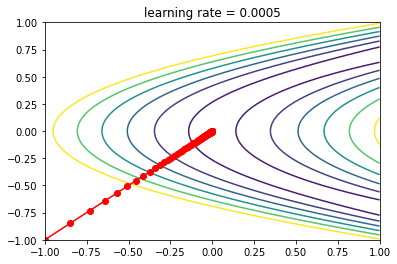

In [ ]:
graph(300, 0.001)
graph(300, 0.00001)
graph(300, 0.0005)

In [ ]:
def grad_descent_momentum(x, grad, alpha, beta=0.9, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta * v + (1 - beta) * grad(x)
        vc = v / (1 + beta**(i+1))
        x = x - alpha * vc
        xs[i+1, :] = x
    return xs

def graph_momentum(iterations, alpha, beta=0.8):
    x0 = np.array([-1,-1])
    xs = grad_descent_momentum(x0, grad, alpha, beta=beta, max_iter=iterations)

    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1, 1, 2, 4, 9, 16, 25, 36, 49]
    c = plt.contour(X, Y, func(X, Y), levels)
    plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
    plt.title('learning rate = {lr}'.format(lr = alpha))
    plt.show()
    

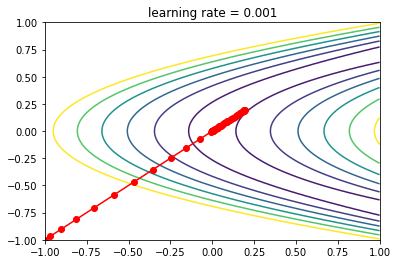

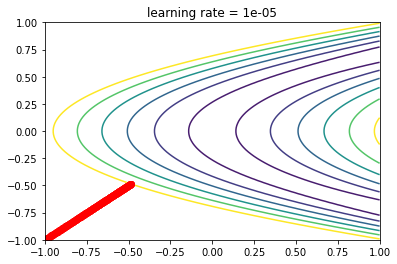

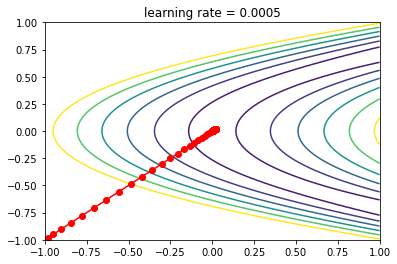

In [ ]:
graph_momentum(300, 0.001)
graph_momentum(300, 0.00001)
graph_momentum(300, 0.0005)

Problem 3 Backprop

part 1
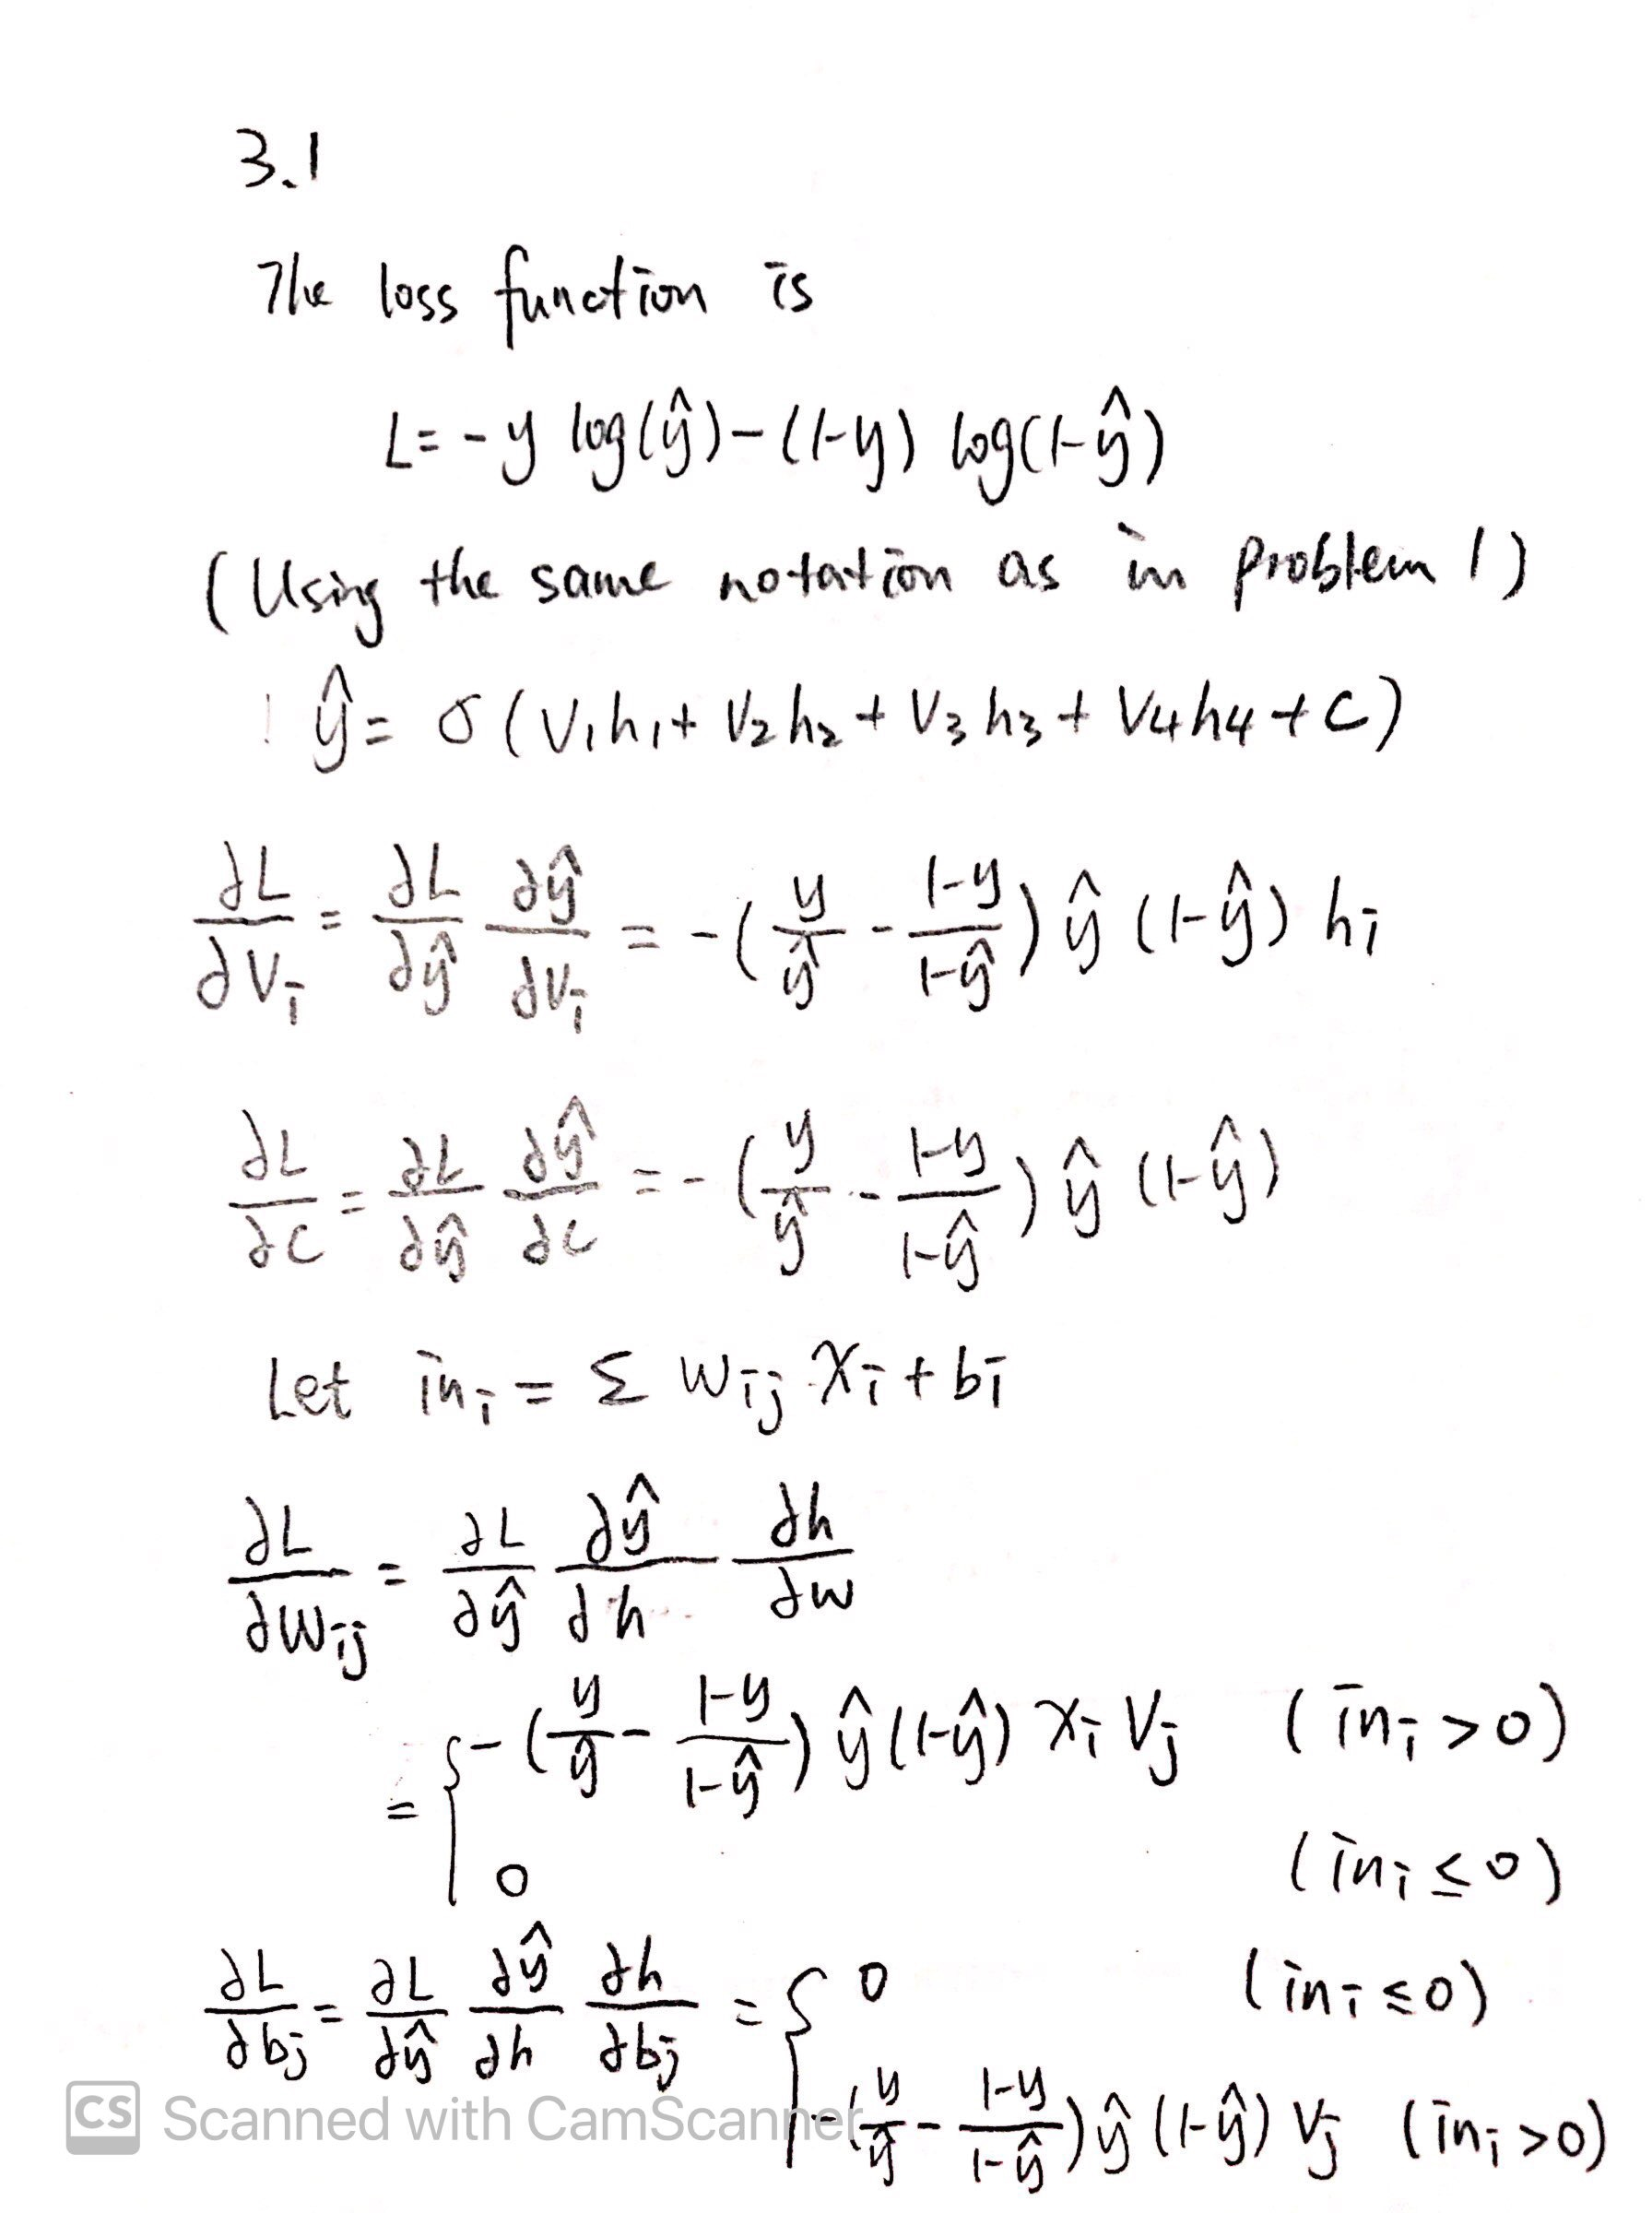

In [70]:
# part 2
def grad_f(x, y, y_hat, w, b, v, c):
    loss_y_hat = (y/y_hat - (1-y)/(1-y_hat))
    h = relu(np.array(x)@np.array(w)+b)
    
    dw = x.T.dot(np.expand_dims((loss_y_hat * y_hat*(1-y_hat)),1).dot(np.expand_dims(v,1).T))
    db = (loss_y_hat* y_hat*(1-y_hat)).T.dot(np.where(h<=0,0,1))*v
    
    dv = (loss_y_hat* y_hat*(1-y_hat)).T.dot(h)
    dc = loss_y_hat.dot(y_hat*(1-y_hat))
    
    return np.array([dw,db,dv,dc]) / len(y)


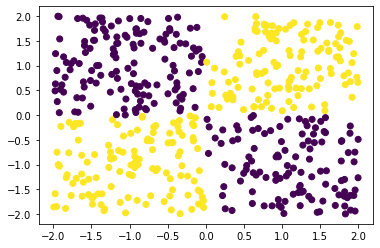

In [65]:
# part 3
x_xor = np.random.uniform(low = -2,high = 2, size=1000).reshape((500,2))
y_xor = np.zeros((500,1))

y_xor[np.logical_and(x_xor[:,0] > 0, x_xor[:,1] > 0)] = 1
y_xor[np.logical_and(x_xor[:,0] < 0, x_xor[:,1] < 0)] = 1

plt.scatter(x_xor[:,0], x_xor[:,1], c = y_xor[:,0])
plt.show()

In [79]:
# part 4
def loss(y, y_hat):
    return np.sum(- (y*np.log(y_hat) + (1-y)*np.log(1 - y_hat)))

def grad_descent(x, y_true, w, b, v, c, iterations=10, learning_rate=0.1):  
    y_pred = ff_nn_Relu(x,w,b,v,c)
    losses = [loss(y_true, y_pred)]
    for i in range(iterations):
        dw,db,dv,dc = grad_f(x, y_true, y_pred, w, b, v, c)
        w = w + learning_rate * dw
        b = b + learning_rate * db
        v = v + learning_rate * dv
        c = c + learning_rate * dc
        y_pred = ff_nn_Relu(x, w, b, v, c)
        l = loss(y_true, y_pred)
        losses.append(l)
    return np.array([w,b,v,c]),losses

In [81]:
array, losses = grad_descent(X, y, W, b, v, c)
plt.plot(losses)
plt.xlabel("iterations")
plt.ylabel("loss")

plt.show()

ValueError: ignored